Graam Liu 

Analysis of 25 M Movie Reviews Spanning Three Centuries

In [8]:
import pandas as pd
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Step 1 Importing

In [9]:
pd.options.display.max_rows = 10

In [10]:
movies = pd.read_csv('movies.csv')

In [11]:
ratings = pd.read_csv('ratings.csv')

Step 2 Cleaning

In [12]:
#merging movies and ratings using a left join 
df = pd.merge(movies, ratings, how = "left")

In [13]:
df

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.0,3.5,1.141416e+09
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.0,4.0,1.439472e+09
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,3.0,1.573944e+09
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,8.586259e+08
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8.0,4.0,8.904925e+08
...,...,...,...,...,...,...
25003466,209157,We (2018),Drama,119571.0,1.5,1.574281e+09
25003467,209159,Window of the Soul (2001),Documentary,115835.0,3.0,1.574281e+09
25003468,209163,Bad Poems (2018),Comedy|Drama,6964.0,4.5,1.574285e+09
25003469,209169,A Girl Thing (2001),(no genres listed),119571.0,3.0,1.574292e+09


In [14]:
#subsetting dataframe to select columns we are interested in
df = df[['title','genres','rating']]

In [15]:
#More Cleaning: next is the process of splitting the title column into title and year. 

In [16]:
#splitting df title column into title and year, and saving it to the new dataframe (used rsplit with only one instance)
title_split = df['title'].str.rsplit("(", n = 1, expand = True)
title_split

,0,1
0,Toy Story,1995)
1,Toy Story,1995)
2,Toy Story,1995)
3,Toy Story,1995)
4,Toy Story,1995)
...,...,...
25003466,We,2018)
25003467,Window of the Soul,2001)
25003468,Bad Poems,2018)
25003469,A Girl Thing,2001)


In [17]:
#renaming columns in title_split to title and year
title_split = title_split.rename(columns = {0:'title',1:'year'})

In [18]:
#adding revised year column to df (using .loc)
df.loc[:,'year'] = title_split['year'] 

In [12]:
#adding revised title column to df
df.loc[:,'title'] = title_split['title']

In [13]:
#in year column, replace all "(" and replace with blank space
df.loc[:,'year'] = df.loc[:,'year'].str.replace("(","")

In [14]:
#in year column, replace all ")" and replace with blank space
df.loc[:,'year'] = df.loc[:,'year'].str.replace(")","")

In [15]:
#re-arranging columns for df using .loc 
df = df.loc[:,['year','title','rating','genres']]

Counting NAs

In [16]:
#count how many NAs there are in df
df.isna().sum()

year      11574
title         0
rating     3376
genres        0
dtype: int64

In [17]:
#drop rows with at least one nan
df = df.dropna()

In [18]:
#count na's after dropping them
df.isna().sum()

year      0
title     0
rating    0
genres    0
dtype: int64

Checking the df for any other cleaning issues

In [19]:
df 

,year,title,rating,genres
0,1995,Toy Story,3.5,Adventure|Animation|Children|Comedy|Fantasy
1,1995,Toy Story,4.0,Adventure|Animation|Children|Comedy|Fantasy
2,1995,Toy Story,3.0,Adventure|Animation|Children|Comedy|Fantasy
3,1995,Toy Story,4.0,Adventure|Animation|Children|Comedy|Fantasy
4,1995,Toy Story,4.0,Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...
25003466,2018,We,1.5,Drama
25003467,2001,Window of the Soul,3.0,Documentary
25003468,2018,Bad Poems,4.5,Comedy|Drama
25003469,2001,A Girl Thing,3.0,(no genres listed)


In [20]:
#df grouped by year
pd.options.display.max_rows = 200
df.groupby(['year'])[['rating']].mean()

,rating
year,
1874,3.027778
1878,2.909091
1880,2.666667
1883,2.636364
1887,1.750000
1888,2.364407
1890,2.178571
1891,1.770000
1892,1.934783


In [21]:
#Problems Found:
#Das Millionenspiel (no year)
#Close Relations (no year)
#Your Past Is Showing (has a year: 1957)
#2006-2007 
#Not grouping all years together, duplicates of same year, even with groupby

#Further Cleaning:
#Need to delete rows with 'Close Relations', 'Das Millionenspiel'
#Need to replace 'Your Past is Showing' with '1957'
#Need to replace all instances of 2006-2007 with 2006
#Convert year column to integers


Further Cleaning

In [22]:
#Need to delete rows with 'Close Relations',
mask1 = df.year.isin(['Close Relations'])
df[mask1]

,year,title,rating,genres
24660900,Close Relations,Rodnye,5.0,Documentary
24660901,Close Relations,Rodnye,3.5,Documentary


In [23]:
df.drop(df[mask1].index, inplace = True)
df

,year,title,rating,genres
0,1995,Toy Story,3.5,Adventure|Animation|Children|Comedy|Fantasy
1,1995,Toy Story,4.0,Adventure|Animation|Children|Comedy|Fantasy
2,1995,Toy Story,3.0,Adventure|Animation|Children|Comedy|Fantasy
3,1995,Toy Story,4.0,Adventure|Animation|Children|Comedy|Fantasy
4,1995,Toy Story,4.0,Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...
25003466,2018,We,1.5,Drama
25003467,2001,Window of the Soul,3.0,Documentary
25003468,2018,Bad Poems,4.5,Comedy|Drama
25003469,2001,A Girl Thing,3.0,(no genres listed)


In [24]:
# Need to delete rows with 'Das Millionenspiel'
mask2 = df.year.isin(['Das Millionenspiel'])
df[mask2]

,year,title,rating,genres
22345646,Das Millionenspiel,"Millions Game, The",3.5,Action|Drama|Sci-Fi|Thriller
22345647,Das Millionenspiel,"Millions Game, The",4.0,Action|Drama|Sci-Fi|Thriller
22345648,Das Millionenspiel,"Millions Game, The",1.0,Action|Drama|Sci-Fi|Thriller
22345649,Das Millionenspiel,"Millions Game, The",3.0,Action|Drama|Sci-Fi|Thriller
22345650,Das Millionenspiel,"Millions Game, The",3.0,Action|Drama|Sci-Fi|Thriller
22345651,Das Millionenspiel,"Millions Game, The",4.0,Action|Drama|Sci-Fi|Thriller
22345652,Das Millionenspiel,"Millions Game, The",4.5,Action|Drama|Sci-Fi|Thriller
22345653,Das Millionenspiel,"Millions Game, The",3.0,Action|Drama|Sci-Fi|Thriller
22345654,Das Millionenspiel,"Millions Game, The",4.0,Action|Drama|Sci-Fi|Thriller
22345655,Das Millionenspiel,"Millions Game, The",4.0,Action|Drama|Sci-Fi|Thriller


In [25]:
df.drop(df[mask2].index, inplace = True)
df

,year,title,rating,genres
0,1995,Toy Story,3.5,Adventure|Animation|Children|Comedy|Fantasy
1,1995,Toy Story,4.0,Adventure|Animation|Children|Comedy|Fantasy
2,1995,Toy Story,3.0,Adventure|Animation|Children|Comedy|Fantasy
3,1995,Toy Story,4.0,Adventure|Animation|Children|Comedy|Fantasy
4,1995,Toy Story,4.0,Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...
25003466,2018,We,1.5,Drama
25003467,2001,Window of the Soul,3.0,Documentary
25003468,2018,Bad Poems,4.5,Comedy|Drama
25003469,2001,A Girl Thing,3.0,(no genres listed)


In [54]:
#Need to replace 'Your past is Showing' with '1957'
df.loc[:,'year'] = df.loc[:,'year'].str.replace("Your Past Is Showing","1957")

In [56]:
#Need to replace all instances of 2006-2007 with 2006
df.loc[:,'year'] = df.loc[:,'year'].str.replace("2006–2007","2006")

In [67]:
#Convert year column to integers
df.loc[:,'year'] = df.year.map(int)

Step 3 Statistical Analysis

In [93]:
#Rows Deleted
25003471-24988547

14924

In [110]:
df.rating.describe()

count    2.498855e+07
mean     3.533797e+00
std      1.060737e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

Step 4 Plots

Text(0, 0.5, 'rating')

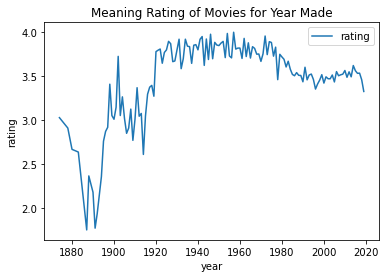

In [106]:
#plot for year vs mean rating
df.groupby(['year'])[['rating']].mean().plot(title = "Meaning Rating of Movies for Year Made").set_ylabel('rating')

Text(0, 0.5, 'standard deviation')

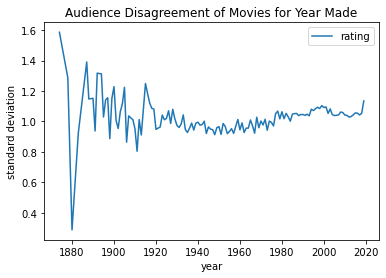

In [108]:
#plot for year vs standard deviation rating 
df.groupby(['year'])[['rating']].std().plot(title = "Audience Disagreement of Movies for Year Made").set_ylabel('standard deviation')

Step 5 Data Export

In [103]:
#Final cleaned dataframe
df

,year,title,rating,genres
0,1995,Toy Story,3.5,Adventure|Animation|Children|Comedy|Fantasy
1,1995,Toy Story,4.0,Adventure|Animation|Children|Comedy|Fantasy
2,1995,Toy Story,3.0,Adventure|Animation|Children|Comedy|Fantasy
3,1995,Toy Story,4.0,Adventure|Animation|Children|Comedy|Fantasy
4,1995,Toy Story,4.0,Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...
25003466,2018,We,1.5,Drama
25003467,2001,Window of the Soul,3.0,Documentary
25003468,2018,Bad Poems,4.5,Comedy|Drama
25003469,2001,A Girl Thing,3.0,(no genres listed)


In [111]:
#Export to CSV file
df.to_csv('CleanMovieRatingData.csv')

Analysis by Graam Liu

I worked individually so the entire project is solely my own. In terms of the dataset, I chose a movie ratings dataset that encompassed over 25 M reviews across many types of genres, spanning from the 19th century up until 2019. I chose it because I have worked in the film and television industry and was curious on the overall trend in people’s perception of entertainment through the years. In addition, I have never worked with such a large dataset and wanted to challenge myself.
Challenges included mostly cleaning the dataset. The data was split among several csv files, so I had to find the correct key to do a left merge and combine the interesting datasets into one: the joined files focused on movie ratings and movie titles. The largest challenge was separating the year the movie was made from the movie title when it was contained in one column. I had to research various panda string methods and look up the documentation to make very specific adjustments such as .rplit() to ensure that only one specific character was split on (‘(‘) in order to make another column. In addition, there were challenges of copying temporary dataframes in order to edit my original dataframe. The method that the pandas documentation recommended was .loc() in order to keep the rows and columns intact without simply making a copy.
Once the data was cleaned and could be analyzed, it become clear that average movie ratings leveled of and begin dropping after the 1980’s. Further research could be done and possibly a correlation with the emergence of sequels and less original content should be researched further. Looking at the standard deviation, there was a slight rise in disagreement among viewers in terms of rating, which might be attributed to growing tastes in new genres, where further research can be done. In addition, more datasets could be subset that focus on genre like comedy vs. drama vs. comedy and drama combined.

References
• F. Maxwell Harper and Joseph A. Konstan. 2015. The MovieLens Datasets: History and Context. ACM Transactions on Interactive Intelligent Systems (TiiS) 5, 4: 19:1–19:19. <https://doi.org/10.1145/2827872 - source of original dataset
• https://grouplens.org/datasets/movielens/ - source of original dataset
• https://grouplens.org/datasets/movielens/ - dataset
• https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html - subsetting dataframe
• https://www.geeksforgeeks.org/split-a-text-column-into-two-columns-in-pandas-dataframe/ - splitting column in dataframe
• https://www.geeksforgeeks.org/python-pandas-split-strings-into-two-list-columns-using-str-split/ - splitting column in dataframe
• https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.split.html ; splitting column
• https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy ; splitting column
• https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy ; splitting column (really for re-ordering columns or slicing)
• https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html renaming columns
• https://realpython.com/pandas-settingwithcopywarning/ settingwithcopy warning
• https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe counting nas
• https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html dropping nas
• https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.split.html .split()
• https://datascience.stackexchange.com/questions/60955/how-to-check-all-values-in-particular-column-has-same-data-type-or-not type on the columns
• https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html .map
• https://datascience.stackexchange.com/questions/60955/how-to-check-all-values-in-particular-column-has-same-data-type-or-not changing data type of column into integers